In [1]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [15]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2692,spam,Urgent Urgent! We have 800 FREE flights to Eur...,NaN,NaN,NaN
5152,ham,Idk. I'm sitting here in a stop and shop parki...,NaN,NaN,NaN
4861,spam,**FREE MESSAGE**Thanks for using the Auction S...,NaN,NaN,NaN
1532,ham,Unfortunately i've just found out that we have...,NaN,NaN,NaN
3081,ham,"And very importantly, all we discuss is betwee...",NaN,NaN,NaN
2847,ham,Sad story of a Man - Last week was my b'day. M...,NaN,NaN,NaN
4491,ham,Probably a couple hours tops,NaN,NaN,NaN
4655,ham,"K, I'll work something out",NaN,NaN,NaN
2093,spam,Final Chance! Claim ur å£150 worth of discount...,NaN,NaN,NaN
3829,ham,I agree. So i can stop thinkin about ipad. Can...,NaN,NaN,NaN


In [17]:
df.shape

(5572, 5)

In [21]:
# clean data
# analysis
# preprocessing
# build model
# evaluation
# improvement
# website integration
# deployment

# Clean Data

In [24]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [26]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [28]:
df.sample(3)

,v1,v2
929,spam,money!!! you r a lucky winner ! 2 claim your p...
1292,ham,Da my birthdate in certificate is in april but...
3499,spam,Dorothy@kiefer.com (Bank of Granite issues Str...


In [30]:
df.rename(columns = {'v1':'target','v2':'text'}, inplace = True)

In [32]:
df.sample(3)

,target,text
51,ham,"A gram usually runs like &lt;#&gt; , a half e..."
2568,ham,Hey. For me there is no leave on friday. Wait ...
5417,ham,Nope. I just forgot. Will show next week


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [38]:
df['target'] = encoder.fit_transform(df['target'])

In [40]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
# missing vals
df.isnull().sum()

target    0
text      0
dtype: int64

In [44]:
df.duplicated().sum()

403

In [46]:
df = df.drop_duplicates(keep='first')

In [48]:
df.shape

(5169, 2)

# EDA (Exploratory Data Analysis)

In [51]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

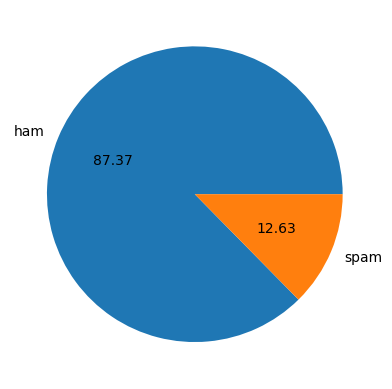

In [57]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

imbalanced data

In [60]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [116]:
#no. of chars
df.loc[:,'num_chars'] = df['text'].apply(len)

In [68]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [118]:
# no. of words
df.loc[:,'num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [78]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [82]:
# no. of sentence
# .loc to know for sure that we are editing original dataframe
df.loc[:,'num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [84]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [86]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
#ham
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [90]:
#spam
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [92]:
import seaborn as sns

C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_chars', ylabel='Count'>

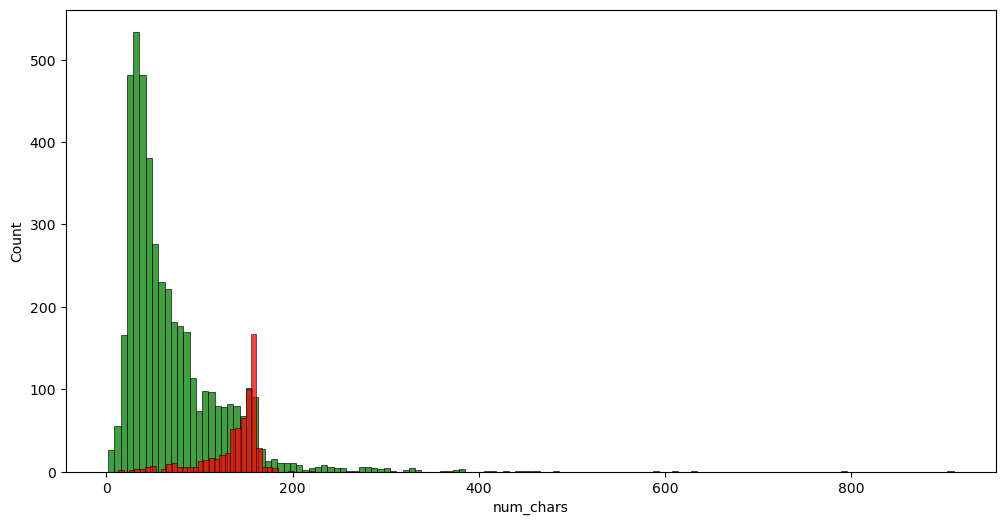

In [98]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'], color='green')
sns.histplot(df[df['target'] == 1]['num_chars'], color='red')

C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

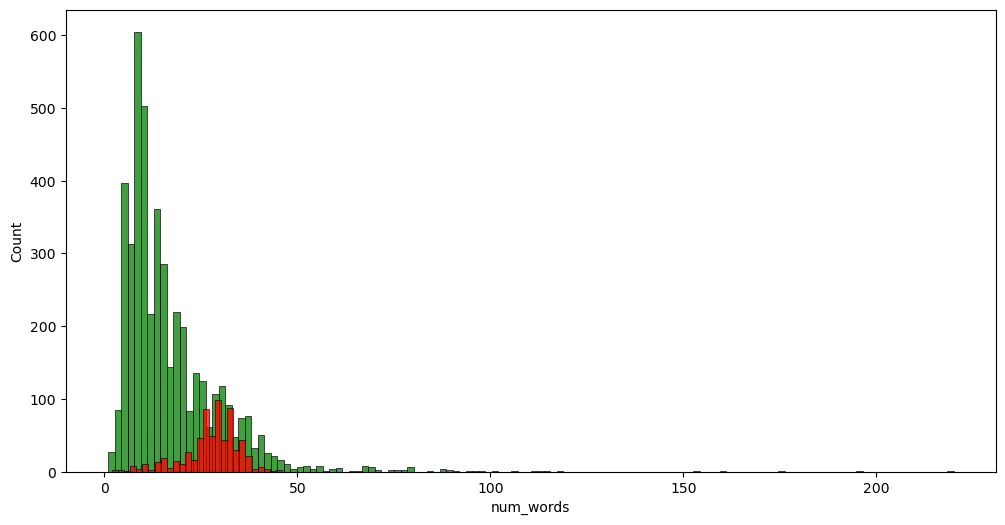

In [100]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color='green')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

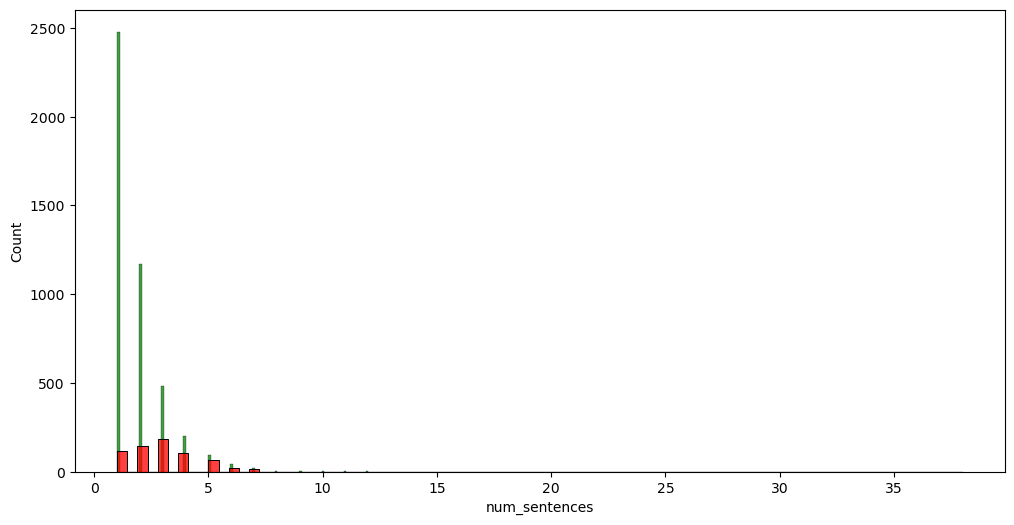

In [102]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'], color='green')
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\soham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


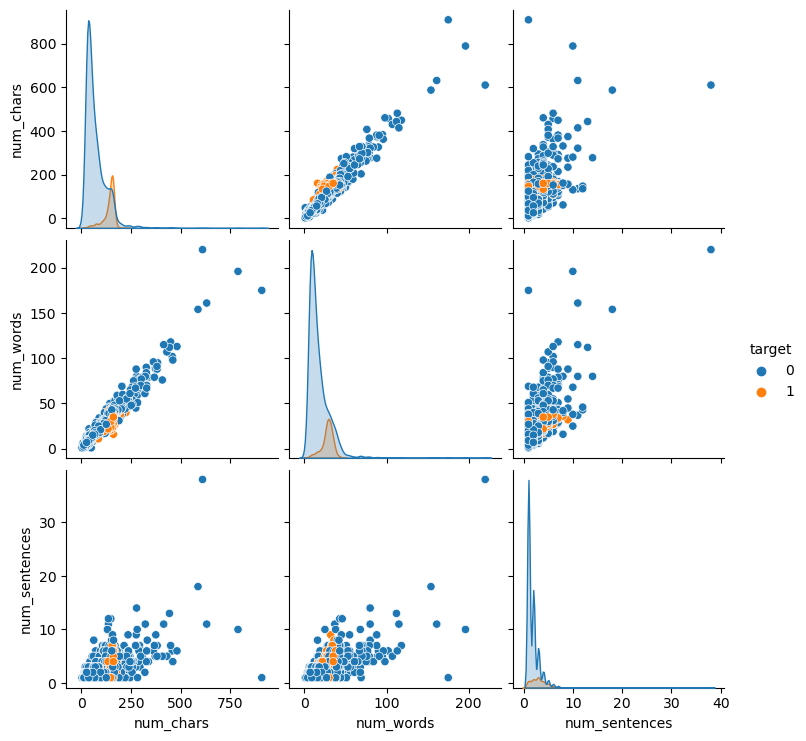

In [104]:
sns.pairplot(df, hue='target')

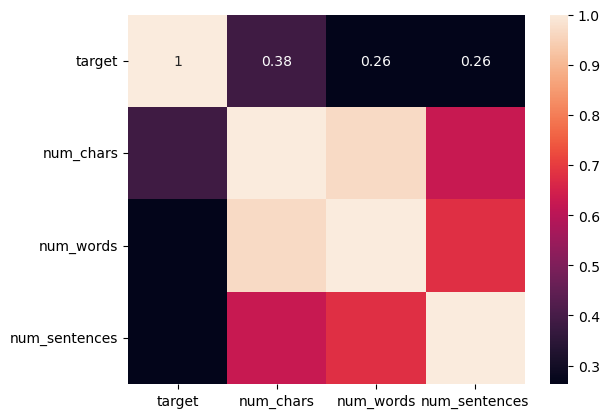

In [150]:
# correlation coefficient only works with numeric data
# sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot = True)
# plt.figure(figsize=(10, 8))
sns.heatmap(df[['target','num_chars', 'num_words', 'num_sentences']].corr(), annot=True)
plt.show()
# annotation bug only first row

# DATA PREPROCESSING
<ul>
    <li>lowercase </li>
    <li>tokenization </li>
    <li>remove special chars </li>
    <li>remove stop words and punctuation </li>
    <li>stemming</li>
</ul>

In [181]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [183]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [195]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('jaywalking')

'jaywalk'

In [197]:
#function
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    temp = []
    for i in text:
        if i.isalnum():
            temp.append(i) 

    text = temp[:];
    temp.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)

    text = temp[:]
    temp.clear()

    for i in text:
        temp.append(ps.stem(i))
    return " ".join(temp)  

In [201]:
transform_text('Jay JAY jaY 100%. JEE hi how are you Jay? You jaywalk jaywalked jaywalking')

'jay jay jay 100 jee hi jay jaywalk jaywalk jaywalk'

In [207]:
#using the function
df.loc[:,'transformed_text'] = df['text'].apply(transform_text)

In [208]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [213]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


In [227]:
from wordcloud import WordCloud #class
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [229]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

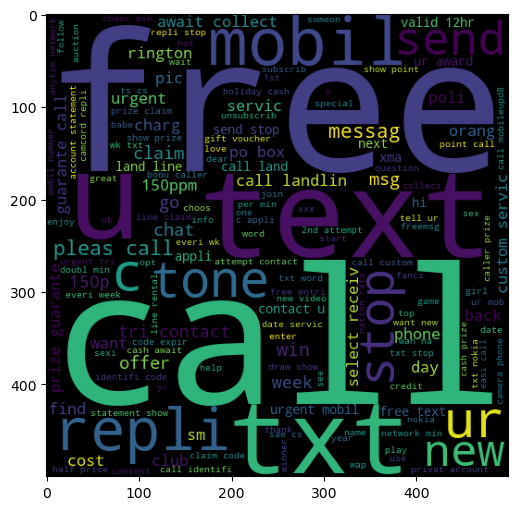

In [233]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

In [235]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

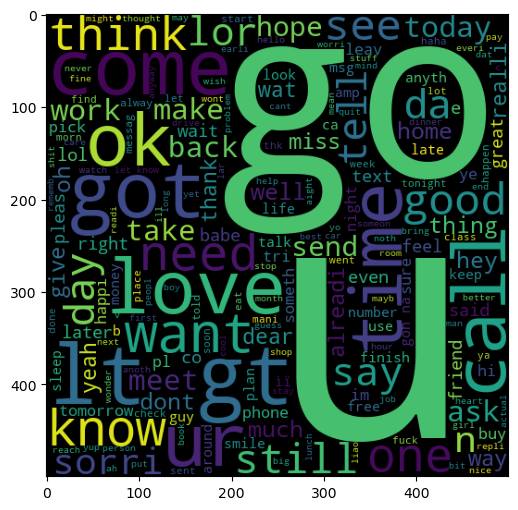

In [237]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In [239]:
# custom code for top n words
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [241]:
len(spam_corpus)

9939

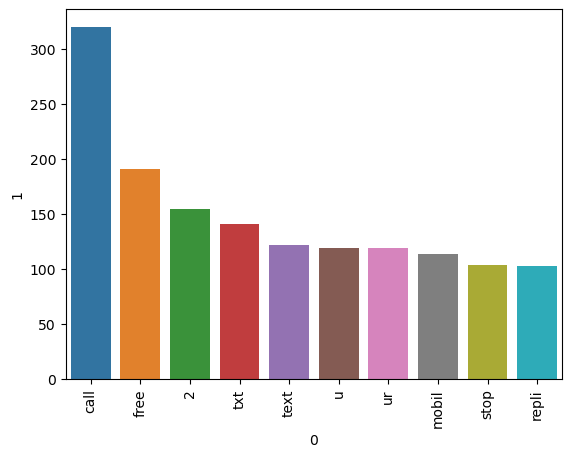

In [259]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(10)), x=0, y=1) # x and y are columns
plt.xticks(rotation='vertical')
plt.show()

In [261]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [263]:
len(ham_corpus)

35404

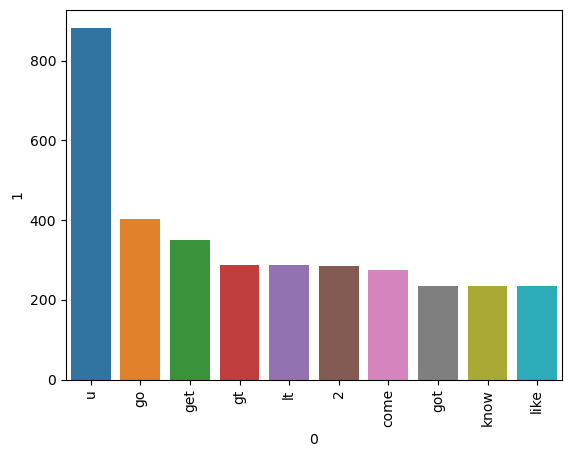

In [265]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(10)), x=0, y=1) # x and y are columns
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING


In [326]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [328]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [330]:
X.shape

(5169, 3000)

In [ ]:
#scaling code (decreases precision in this data set)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [332]:
Y = df['target'].values

In [334]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [336]:
from sklearn.model_selection import train_test_split

In [338]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [340]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [342]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [344]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [346]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [348]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [324]:
# tfidf -> mnb (best precision)

In [ ]:
# try to improve model :
# changing max features in tfidf
# scale X
# Voting Classifier (combination of best performing algos)
# stacking

In [350]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))